In [106]:
%pdb off
%matplotlib inline
from VLM.bzFRInGE import *

from VLM.bzFRInGE.experiments import *
from VLM.bzFRInGE.FRINGEBase import ExpBase
from VLM.bzFRInGE.plotting import plotFringe
from mintpy.cli import view
fs,ls = (20, 20), 20

# from tqdm import tqdm
# import urllib.request

exp = Kiribati_SR
Exp = ExpBase(exp)
os.chdir(Exp.path_wd)
print ('PWD:', os.getcwd())
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now())

Automatic pdb calling has been turned OFF
Unsupported multilook size for posting
Got 0 wrapped ifgs (SR)
PWD: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati
(FRInGE)  2023-08-20 15:51:52.774374


## Download DEM

In [107]:
S1, N1 = int(np.floor(Exp.SNWE[0])), int(np.ceil(Exp.SNWE[1]))
W1, E1 = int(np.floor(Exp.SNWE[2])), int(np.ceil(Exp.SNWE[3]))
W2, E2 = str(np.abs(W1)).zfill(3), str(np.abs(E1)).zfill(3)

In [3]:
f_dem = f'sarDEM_{Exp.reg}_COP.dem'
path_dem = op.join(Exp.path_dems, f_dem)
# cmd = f'sardem -isce --bbox {W1} {S1} {E1} {N1} -o {path_dem}'
cmd = f'sardem -isce --bbox {W1} {S1} {E1} {N1} --data-source COP -o {path_dem}'

print (cmd)
!{cmd}


sardem -isce --bbox -158 1 -157 3 --data-source COP -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/DEM/sarDEM_Kiribati_COP.dem
/bin/bash: sardem: command not found


## Prep RAW

You'll have to add the correct stripmap to path. 
Currently set up in FRiNGE environment

In [4]:
## Download the orbits
# use sentineleof in the raw SLC directory and copy over to Exp.path_wd

In [5]:
## Prep the S1 SAFE files for stackStripMap 
# Note that I removed manually half the frames which didn't cover the island for Kiribati
# Could probably be automated, as these were < ~1.2 GB
import zipfile
import isce
from isce.components.contrib.stack.stripmapStack.unpackFrame_S1 import unpack

path_slcs    = '/mnt/leffe-raw/slc/S1/track_095_kiribati'
path_dst_dir = '/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC'
path_orbits  = op.join(op.dirname(path_dst_dir), 'orbits')
overwrite    = False
os.makedirs(path_dst_dir, exist_ok=True)
assert op.exists(path_orbits), 'Download the orbits with sentineleof'
for f in os.listdir(path_slcs):
    if not f.endswith(".zip"):
        continue
    path_slc = op.join(path_slcs, f)
    dst_slc  = op.join(path_dst_dir, op.basename(path_slc).replace('zip', 'SAFE'))
    date     = f.split('_')[5].split('T')[0]
    dst_dir  = op.join(path_dst_dir, date)

    ## unzip the file to local if it doesnt exist
    if op.exists(dst_slc) and not overwrite:
        log.info('Skipping %s', dst_slc)
    else:
        log.info('Unzipping %s to %s', path_slc, path_dst_dir)
        with zipfile.ZipFile(path_slc, 'r') as zip_ref:
            zip_ref.extractall(path_dst_dir)

    ## now unpack this SLC
    log.info('Unpacking %s to %s', dst_slc, dst_dir)
    unpack(dst_slc, dst_dir, 'vv', path_orbits)

Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20190326T044140_20190326T044154_015521_01D164_5549.SAFE/annotation/s1b-s3-slc-vv-20190326t044140-20190326t044154-015521-01d164-002.xml
Input TIFF files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20190326T044140_20190326T044154_015521_01D164_5549.SAFE/measurement/s1b-s3-slc-vv-20190326t044140-20190326t044154-015521-01d164-002.tiff
Manifest files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20190326T044140_20190326T044154_015521_01D164_5549.SAFE/manifest.safe
Doppler Fit :  [ 3.75833362e+01 -1.30704211e-03  3.51483332e-08]
Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20190101T044141_20190101T044156_014296_01A982_2EB9.SAFE/annotation/s1b-s3-slc-vv-20190101t044141-20190101t044156-014296-01a982-002.xml
Input TIFF files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_2019

Doppler Fit :  [-3.99577020e+00  2.84847792e-03 -1.31646071e-07]
Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20170429T044128_20170429T044152_005371_00969A_5E9C.SAFE/annotation/s1b-s3-slc-vv-20170429t044128-20170429t044152-005371-00969a-002.xml
Input TIFF files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20170429T044128_20170429T044152_005371_00969A_5E9C.SAFE/measurement/s1b-s3-slc-vv-20170429t044128-20170429t044152-005371-00969a-002.tiff
Manifest files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20170429T044128_20170429T044152_005371_00969A_5E9C.SAFE/manifest.safe
Doppler Fit :  [ 4.57854324e+01  5.44957651e-04 -3.69387827e-08]
Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20190125T044140_20190125T044155_014646_01B4BB_9094.SAFE/annotation/s1b-s3-slc-vv-20190125t044140-20190125t044155-014646-01b4bb-002.xml
Input TIFF files:  /u/leffe-dat

Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20180915T044142_20180915T044207_012721_0177A5_429F.SAFE/annotation/s1b-s3-slc-vv-20180915t044142-20180915t044207-012721-0177a5-002.xml
Input TIFF files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20180915T044142_20180915T044207_012721_0177A5_429F.SAFE/measurement/s1b-s3-slc-vv-20180915t044142-20180915t044207-012721-0177a5-002.tiff
Manifest files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20180915T044142_20180915T044207_012721_0177A5_429F.SAFE/manifest.safe
Doppler Fit :  [ 6.87345708e+01 -1.53967367e-03  6.05717828e-08]
Input XML file:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_20170523T044130_20170523T044153_005721_00A05C_6D47.SAFE/annotation/s1b-s3-slc-vv-20170523t044130-20170523t044153-005721-00a05c-002.xml
Input TIFF files:  /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/S1B_S3_SLC__1SDV_2017

In [ ]:
# get rid of the SAFE files
!rm -r *.SAFE

In [15]:
## print the dates we've got
slcs = sorted(os.listdir(op.join(Exp.path_wd, 'SLC')))
print (slcs)
print (len(slcs))

['20161019', '20161112', '20161206', '20161230', '20170123', '20170216', '20170228', '20170312', '20170405', '20170429', '20170523', '20170616', '20170710', '20170803', '20170827', '20180611', '20180623', '20180705', '20180915', '20180927', '20181009', '20181021', '20181102', '20181114', '20181208', '20181220', '20190101', '20190113', '20190125', '20190218', '20190302', '20190314', '20190326', '20190407', '20190419']
35


In [ ]:
## Not sure where this file is / don't think it's needed
# ! sh ../download/create_raw_alos.txt

## run stackStripMap

In [17]:
!stackStripMap.py -h

usage: stackStripMap.py [-h] -s SLCDIR [-x BBOX] [-w WORKDIR] -d DEM
                        [-m REFERENCEDATE] [-t DTTHR] [-b DBTHR] [-a ALKS]
                        [-r RLKS] [-S SENSOR] [-u UNWMETHOD] [-f FILTSTRENGTH]
                        [-L FL] [-H FH] [-B BANDWIDTH]
                        [--filter_sigma_x FILTERSIGMAX]
                        [--filter_sigma_y FILTERSIGMAY]
                        [--filter_size_x FILTERSIZEX]
                        [--filter_size_y FILTERSIZEY]
                        [--filter_kernel_rotation FILTERKERNELROTATION]
                        [-W WORKFLOW] [-z] [--nofocus] [-c TEXT_CMD] [-useGPU]
                        [--summary]

Preparing the directory structure and config files for stack processing of
StripMap data

options:
  -h, --help            show this help message and exit
  -s SLCDIR, --slc_directory SLCDIR
                        Directory with all stripmap SLCs
  -x BBOX, --bbox BBOX  Lat/Lon Bounding SNWE
  -w WORKDIR, --work

In [23]:
## make the config files
cmd  = f'stackStripMap.py -s {Exp.path_wd}/SLC/ '
# cmd += f'-x "{Exp.SNWEs}" '
cmd += f'-d {path_dem} '
cmd += f'-w {Exp.path_wd} '
cmd += f'-W slc '
# cmd += '-t 700 '  # max temporal baseline (days)
# cmd += '-f 0.6 '   # goldstein filter strength
cmd += f'-a 1 -r 1 '
cmd += f'-u snaphu --zero --nofocus '#' -S Sentinel1'

print (cmd)
# !{cmd}

stackStripMap.py -s /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/ -d /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/DEM/sarDEM_Kiribati_COP.dem -w /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati -W slc -a 1 -r 1 -u snaphu --zero --nofocus 


#### IMPORTANT NOTES

- geom_reference wont get made since it only gets made when multilooking is requested. And then the watermask isn't downloaded. Let's symlink the merged/geom_reference to path_wd and see how that works and re-run
    - After it crashes, symlink the geom, comment out the first workflow of config/config_reference_ and rerun run_01_reference

- Step 4 will take a LONG TIME if you dont specify a perpendicular basetime; it will do ALL possible pairs
- In Step 5 (invert_misreg), you may have some pairs without azpoly in the shelf file (you can check misreg.bak)
    - Just remove these directories from the pairs and continue..
    - My edited invert_misreg.py (/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.10/site-packages/isce/components/contrib/stack/stripmapStack) should stop if it finds one. then move it manually.
- tops2vrt (for FRInGE) has been modified to get the .slc (not just .slcfull)

In [24]:
## create the files for an interferogram workflow and compare
path_runfiles0   = f'{Exp.path_wd}/run_files'
path_runfiles_fr = f'{Exp.path_wd}/run_files_FRInGE'

path_configs0   = f'{Exp.path_wd}/configs'
path_configs_fr = f'{Exp.path_wd}/configs_FRInGE'

os.rename(path_runfiles0, path_runfiles_fr)
os.rename(path_configs0, path_configs_fr)

In [75]:
## make the config files
cmd  = f'stackStripMap.py -s {Exp.path_wd}/SLC/ '
# cmd += f'-x "{Exp.SNWEs}" '
cmd += f'-d {path_dem} '
cmd += f'-w {Exp.path_wd} '
cmd += f'-W interferogram '
# cmd += '-t 5000 '  # max temporal baseline (days)
# cmd += '-f 0.6 '   # goldstein filter strength
# cmd += f'-a {Exp.naz} -r {Exp.nrg} '
cmd += f'-a 1 -r 1 '
cmd += f'-u snaphu -useGPU --zero --nofocus '#' -S Sentinel1'

print (cmd)
# !{cmd}

stackStripMap.py -s /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/SLC/ -d /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/DEM/sarDEM_Kiribati_COP.dem -w /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati -W interferogram -a 1 -r 1 -u snaphu -useGPU --zero --nofocus 


**MORE IMPORTANT NOTES**

You need to make an interferogram and use the reference shelve file for MintPy. Make sure to just create one by editing the run_08 file

## Try FRInGE

In [28]:
os.path.exists(f'{Exp.path_wd}/slcs')

False

In [34]:
!tops2vrt.py -h

usage: tops2vrt.py [-h] -i INDIR [-s STACKDIR] [-g GEOMDIR] [-c OUTDIR]
                   [-b Y0 Y1 X0 X1] [-B S N W E]

Tops SLC stack to VRT

options:
  -h, --help            show this help message and exit
  -i INDIR, --input INDIR
                        Merged directory of tops stack generation
  -s STACKDIR, --stack STACKDIR
                        Directory where the vrt stack will be stored (default
                        is "stack")
  -g GEOMDIR, --geom GEOMDIR
                        Directory where the geometry vrts will be stored
                        (default is "geometry")
  -c OUTDIR, --slcs OUTDIR
                        Directory where the individual slc vrts will be stored
                        (default is "slcs")
  -b Y0 Y1 X0 X1, --bbox Y0 Y1 X0 X1
                        bounding box in row col: minLine maxLine minPixel
                        maxPixel
  -B S N W E, --geo_bbox S N W E
                        bounding box in lat lon: South North West East


In [33]:
# need this for geom; creates coreg_stack, slcs?
cmd  = f'tops2vrt.py -i {Exp.path_wd}/merged -s {Exp.path_wd}/coreg_stack '
cmd += f'-g {Exp.path_wd}/geometry -c {Exp.path_wd}/slcs -b 10000 25000 0 9000'#'-B {Exp.SNWEs} '

print (cmd)
# !{cmd}

tops2vrt.py -i /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged -s /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/coreg_stack -g /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/geometry -c /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/slcs -b 10000 25000 0 9000


In [31]:
cmd  = f'nmap.py -i {Exp.path_wd}/coreg_stack/slcs_base.vrt '
cmd += f'-x {Exp.nx} -y {Exp.ny} '#'-m {Exp.path_mask} '
cmd += f'-c {Exp.path_wd}/KS2{Exp.nxy}/count --o {Exp.path_wd}/KS2{Exp.nxy}/nmap '
print (cmd)

nmap.py -i /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/coreg_stack/slcs_base.vrt -x 33 -y 15 -c /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/KS2_33_15/count --o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/KS2_33_15/nmap 


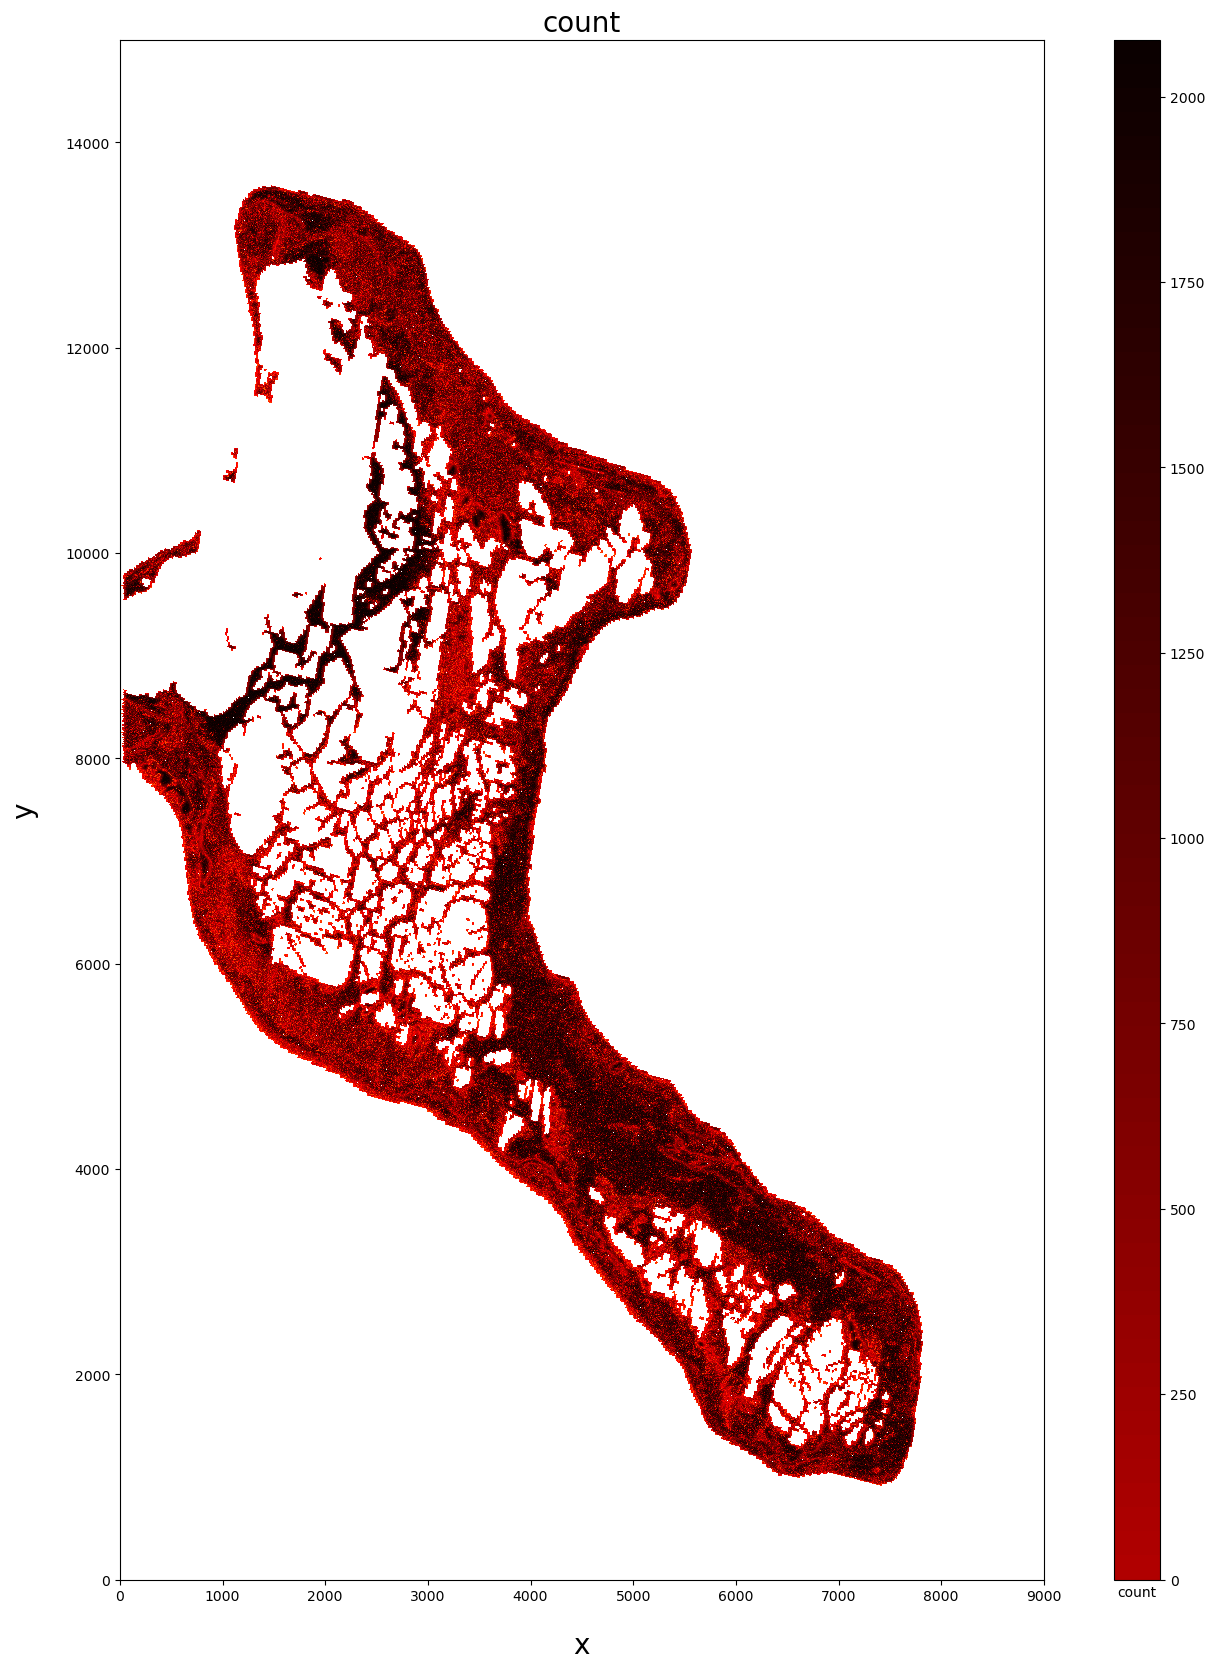

In [97]:
path_count = op.join(Exp.path_wd, f'KS2{Exp.nxy}', 'count')

cmd  = f'plotFringe.py {path_count}'

f, a = plotFringe.configure(cmd, figsize=fs, labelsize=ls)

## Quick View an IFG

In [86]:
path_igrams = f'{Exp.path_wd}/Igrams'
path_wrap = op.join(path_igrams, '20071215_20080501', 'filt_20071215_20080501.int')
path_unw  = op.join(path_igrams, '20071215_20080501/filt_20071215_20080501_snaphu.unw')

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .int file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501.int in complex64 format
file size in y/x: (3072, 929)
input dataset: "['phase']"
num of datasets in file filt_20071215_20080501.int: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: cmo.phase
figure title: filt_20071215_20080501.int
figure size : [3.02, 8.00]
reading data ...
data    range: [-3.141585, 3.141585] radian
display range: [-3.14, 3.14] radian
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


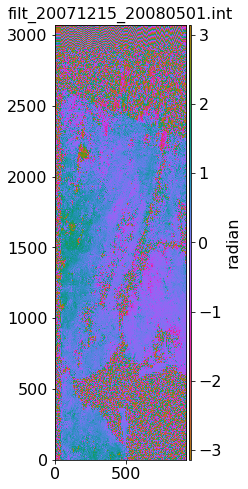

In [80]:
%matplotlib inline
cmd = f'view.py {path_wrap} phase --flip-ud -v -3.14 3.14 -c cmo.phase'
obj = viewer(cmd)
obj.configure(); obj.plot()

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .int file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501.int in complex64 format
file size in y/x: (3072, 929)
input dataset: "['magnitude']"
num of datasets in file filt_20071215_20080501.int: 2
datasets to exclude (0):
[]
datasets to display (1):
['magnitude']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: jet
figure title: filt_20071215_20080501.int
figure size : [3.02, 8.00]
reading data ...
data    range: [0.0, 5059965.5] 1
display range: [-3.141592653589793, 3.141592653589793] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


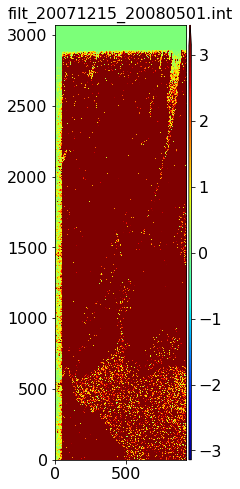

In [83]:
%matplotlib inline
cmd = f'view.py {path_wrap} magnitude --flip-ud'
obj = viewer(cmd)
obj.configure(); obj.plot()

run view.py in MintPy version 1.4.1-4, date 2022-09-04
input file is isce .unw file: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501_snaphu.unw in float32 format
file size in y/x: (3072, 929)
input dataset: "['phase']"
num of datasets in file filt_20071215_20080501_snaphu.unw: 2
datasets to exclude (0):
[]
datasets to display (1):
['phase']
data   coverage in y/x: (0, 0, 929, 3072)
subset coverage in y/x: (0, 0, 929, 3072)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: roma
figure title: filt_20071215_20080501_snaphu.unw - phase
figure size : [3.02, 8.00]
reading data ...
data    range: [-139.35736, 96.15209] radian
display range: [-139.35736, 96.15209] radian
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


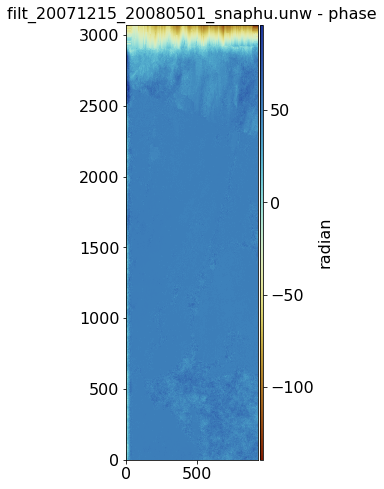

In [90]:
%matplotlib inline
cmd = f'view.py {path_unw} phase --flip-ud -c roma'#velocity -u mm -c roma --noverbose -v -5 5 --figsize {fs[0]} {fs[1]} '
obj = viewer(cmd)
obj.configure(); obj.plot()

## Mask

### Water

In [43]:
## not correct assert; neeed to check if it crosses boundaries
# assert ((N-S)<5) and np.abs(Exp.SNWE[2]-Exp.SNWE[3])<5, 'need multiple tiles for large area'
S0 = 5 * int(np.floor(Exp.SNWE[0]/5))
W0 = np.abs(5 * int(np.floor(Exp.SNWE[2]/5)))

sn = 'n' if S0 >= 0 else 's'
ew = 'e' if Exp.SNWE[2] > 0 else 'w'

tiles = [f'{sn}{S0:02}{ew}{W0:03}.tif']
if Exp.reg == 'Charleston':
    tiles.append('n30w080.tif')

if Exp.reg == 'Miami':
    tiles.append('n25w080.tif')
    tiles.append('n20w085.tif')
if Exp.reg == 'Philly':
    tiles.append('n40w080.tif')
    tiles.append('n40w075.tif')
    tiles.append('n35w075.tif')

In [44]:
import shutil
path_cropdir = op.join(op.dirname(Exp.path_crops), 'OSM_WaterLayer_tif')
os.makedirs(Exp.path_crops, exist_ok=True)
os.makedirs(path_cropdir, exist_ok=True)

for tile in tiles:
    print ('Tile:', tile)
    shutil.copy(op.join(path_cropdir, tile), op.join(Exp.path_crops, tile))

Tile: n00w160.tif


In [45]:
# after downloading and extracting identify the tile(s)
src = [op.join(Exp.path_crops, tile) for tile in tiles]
dst = op.join(Exp.path_crops, 'OSM_wmask.tif')
os.remove(dst) if op.exists(dst) else ''

cmd = f'gdal_merge.py -o {dst} {" ".join(src)} -of "GTiff" -a_nodata 2'
print (cmd)
!{cmd}

mask_file = gdal.Open(dst, gdal.GA_Update)
arr       = mask_file.ReadAsArray()

# 0 is land in dst; convert that its own land value
arr       = np.where(arr==0, 6, arr) 
# convert all water classes except small tributaries & canals to 0
arr       = np.where(arr<4, 0, 1) 
# plt.imshow(arr, cmap='binary_r'); plt.colorbar()


err_code   = mask_file.GetRasterBand(1).WriteArray(arr)
if err_code == 0:
    print (f'Wrote: {dst}')
else:
    print ('Error writing array')
del mask_file

gdal_merge.py -o /u/leffe-data2/buzzanga/data/Crops/Kiribati/OSM_wmask.tif /u/leffe-data2/buzzanga/data/Crops/Kiribati/n00w160.tif -of "GTiff" -a_nodata 2
0...10...20...30...40...50...60...70...80...90...100 - done.
Wrote: /u/leffe-data2/buzzanga/data/Crops/Kiribati/OSM_wmask.tif


In [49]:
# check to make sure the mask covers the study area
import xarray as xr
import rioxarray as xrr
da = xr.open_rasterio(dst).sel(band=1)
assert da.y.min() < S1 < da.y.max(), 'S is out of bounds'
assert da.y.min() < N1 < da.y.max(), 'N is out of bounds'
assert da.x.min() < W1 < da.x.max(), 'W is out of bounds'
assert da.x.min() < E1 < da.x.max(), 'E is out of bounds'
print ('GOOD')

2023-08-18 12:47:21,161 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x7f06c378c5b0>
2023-08-18 12:47:21,163 - rasterio.env - DEBUG - Starting outermost env
2023-08-18 12:47:21,164 - rasterio.env - DEBUG - No GDAL environment exists
2023-08-18 12:47:21,165 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x7f06cd38c8b0> created
2023-08-18 12:47:21,166 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-08-18 12:47:21,167 - rasterio._env - DEBUG - PROJ_DATA found in environment.
2023-08-18 12:47:21,168 - rasterio._env - DEBUG - Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f06cd38c8b0>.
2023-08-18 12:47:21,169 - rasterio.env - DEBUG - Entered env context: <rasterio.env.Env object at 0x7f06c378c5b0>
2023-08-18 12:47:21,170 - rasterio._base - DEBUG - Sharing flag: 0
2023-08-18 12:47:21,171 - rasterio._base - DEBUG - Nodata success: 1, Nodata value: 2.000000
2023-08-18 12:47:21,172 - rasterio._base - DEBUG -

run view.py in MintPy version 1.5.1, date 2023-01-03
input file is gdal .tif file: /u/leffe-data2/buzzanga/data/Crops/Kiribati/OSM_wmask.tif in uint8 format
file size in y/x: (6000, 6000)
num of datasets in file OSM_wmask.tif: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 6000, 6000)
subset coverage in y/x: (0, 0, 6000, 6000)
data   coverage in lat/lon: (-160.00083333333333, 4.999999999999999, -155.00083333333333, -1.3973739700079424e-15)
subset coverage in lat/lon: (-160.00083333333333, 4.999999999999999, -155.00083333333333, -1.3973739700079424e-15)
------------------------------------------------------------------------
colormap: binary
figure title: OSM_wmask.tif
figure size : [7.50, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 1] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plot in geo-coo

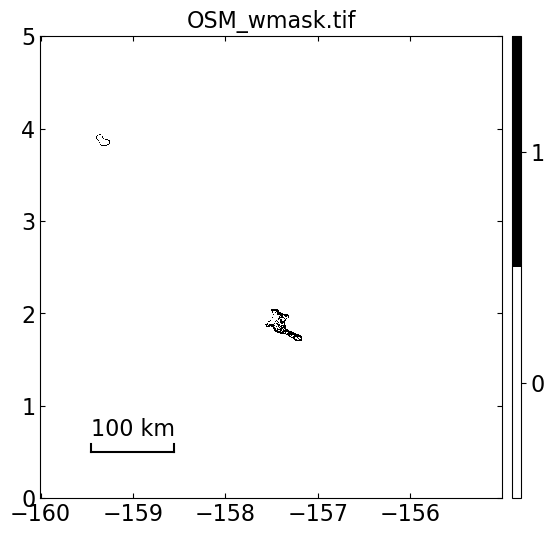

In [48]:
cmd = f'{dst} -c binary' 
obj = view.main(cmd.split())

In [50]:
use_OSM  = True

if use_OSM:
    base = 'OSM_wmask'
    src0 = op.join(Exp.path_crops, f'{base}.tif')
    msk  = '--nonzero'
else:
    base = 'swbd'
    src0 = glob.glob(op.join(Exp.path_masks, f'{base}*.wbd'))[0]
    msk  = '-M 200'

In [52]:
# use ISCE files to radarcode full mask... takes like 10 hours
path_water_full = op.join(Exp.path_masks, f'{base}_isce.h5')
geom_ref        = op.join(Exp.path_wd, 'merged', 'geom_reference')

cmd  = f'geocode.py {src0} -o {path_water_full}  --geo2radar --nprocs 24 --ram 36 '
cmd += f'--lat-file {geom_ref}/lat.rdr --lon-file {geom_ref}/lon.rdr'

# cmd  = f'geocode.py {src0} -o {dst} -l {Exp.path_geom_mp} --geo2radar ' # if mintpy geom exists

print (cmd)
# !{cmd}

geocode.py /u/leffe-data2/buzzanga/data/Crops/Kiribati/OSM_wmask.tif -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/OSM_wmask_isce.h5  --geo2radar --nprocs 24 --ram 36 --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lat.rdr --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lon.rdr


run view.py in MintPy version 1.5.1, date 2023-01-03
input file is .tif file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/OSM_wmask_isce.h5 in uint8 format
file size in y/x: (45648, 19118)
num of datasets in file OSM_wmask_isce.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 19118, 45648)
subset coverage in y/x: (0, 0, 19118, 45648)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: OSM_wmask_isce
figure size : [4.19, 8.00]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 1] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


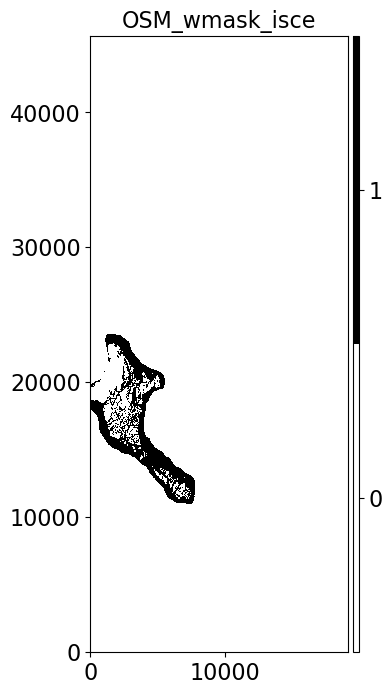

In [55]:
## plot the radarcoding results
cmd = f'{path_water_full} -c binary --flip-ud' 
obj = view.main(cmd.split())

In [68]:
## then make a mask from radarcoded waterMask; -1 is water so mask BELOW (-m 0)
# newer looks like 0/255 values, so mask ABOVE (-M 200)
src             = path_water_full
path_wmask_full = op.join(Exp.path_masks, 'waterMask_isce.h5')

cmd = f'generate_mask.py {src} -o {path_wmask_full} {msk}'

print (cmd)
!{cmd}

generate_mask.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/OSM_wmask_isce.h5 -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask_isce.h5 --nonzero
input .tif file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/OSM_wmask_isce.h5
read /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/OSM_wmask_isce.h5
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with zero value
delete exsited file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask_isce.h5
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask_isce.h5 with w mode
create dataset /mask of bool       in size of (45648, 19118)       with compression=None
finished writing to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask_isce.h5
time used: 00 mins 7.6 secs.


In [69]:
## rename dataset for mintpy
with h5py.File(path_wmask_full, 'r+') as h5:
    mask = h5['mask'][:]
    dset = h5.create_dataset('waterMask', data=mask, dtype=bool)
    del h5['mask']

run view.py in MintPy version 1.5.2, date 2023-08-09
input file is mask file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask_isce.h5 in bool format
file size in y/x: (45648, 19118)
num of datasets in file waterMask_isce.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['waterMask']
data   coverage in y/x: (0, 0, 19118, 45648)
subset coverage in y/x: (0, 0, 19118, 45648)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: waterMask_isce
figure size : [4.2, 8.0]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [False, True] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


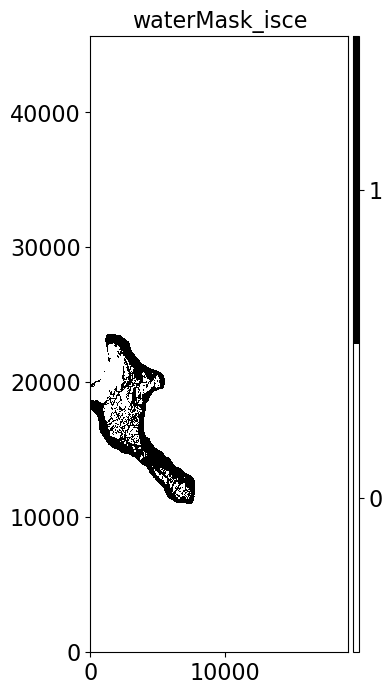

In [70]:
## plot the masking results
cmd = f'{path_wmask_full} -c binary --flip-ud' 
obj = view.main(cmd.split())

**Import Notes**
- Need to hack the prep_fringe to create meta['WIDTH'] (src_box[2]-src_box[0]) and meta['LENGTH'] (src_box[3]-src_box[1])
- Symlink the lat/lon/hgt files to a .full extensing

In [138]:
for f in 'lat lon hgt los shadowMask incLocal'.split():
    for ext in ['', '.vrt']:
        src = f'{Exp.path_wd}/merged/geom_reference/{f}.rdr{ext}'
        dst = f'{Exp.path_wd}/merged/geom_reference/{f}.rdr.full{ext}'
        print (src)
        if not op.exists(dst):
            os.symlink(src, dst)
        else:
            print (f'{dst} already exists')

/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lat.rdr
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lat.rdr.full already exists
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lat.rdr.vrt
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lat.rdr.full.vrt already exists
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lon.rdr
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lon.rdr.full already exists
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lon.rdr.vrt
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/lon.rdr.full.vrt already exists
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/hgt.rdr
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_reference/hgt.rdr.full already exists
/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/geom_

In [ ]:
# use mintpy to crop the full resolution geometry and mask to the correct bbox
os.chdir(Exp.path_wd)

cmd  = f'prep_fringe.py -u None -c None --geom-only '  
cmd += f'-g {Exp.path_wd}/geometry '
cmd += f'-m {Exp.path_wd}/Igrams/20161019_20161112/referenceShelve/data.dat '

cmd += f'-b {Exp.path_wd}/baselines '
cmd += f'-o {Exp.path_wd}/geometry '

cmd += f'--water-mask {path_wmask_full} '
print (cmd)
!{cmd}

run view.py in MintPy version 1.5.2, date 2023-08-09
input file is geometry file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/geometry/inputs/geometryRadar.h5 in float32 format
file size in y/x: (15000, 9000)
input dataset: "['height']"
num of datasets in file geometryRadar.h5: 8
datasets to exclude (0):
[]
datasets to display (1):
['height']
data   coverage in y/x: (0, 0, 9000, 15000)
subset coverage in y/x: (0, 0, 9000, 15000)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: DEM_print
figure title: height
figure size : [6.0, 8.0]
reading data ...
data    range: [15.867924875680599, 37.63680729896799] m
display range: [15.867924875680599, 37.63680729896799] m
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
showing ...


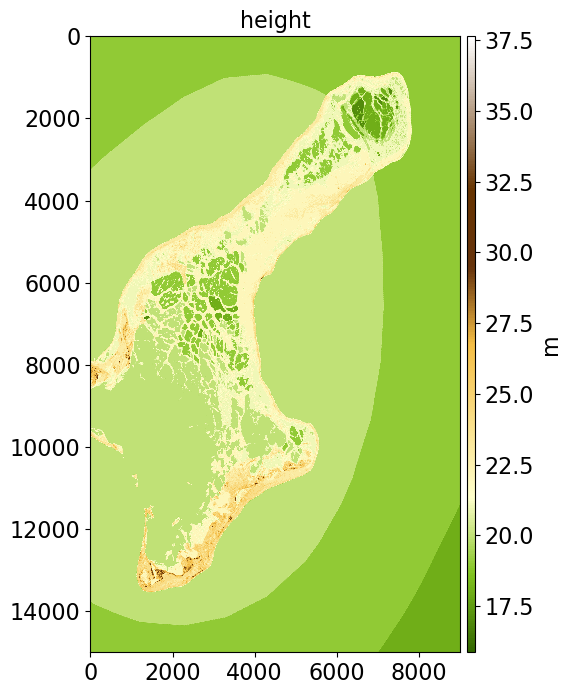

In [92]:
## check the watermask within the mintpy geometry
cmd = f'{Exp.path_wd}/geometry/inputs/geometryRadar.h5 height -c DEM_print '#'-v -40 40' 
view.main(cmd.split())

In [94]:
## pull the cropped watermask out of the geometry
path_mask = op.join(Exp.path_masks, 'waterMask.h5')
cmd = f'generate_mask.py {Exp.path_wd}/geometry/inputs/geometryRadar.h5 waterMask -o {path_mask} --nonzero'
print (cmd)
!{cmd}

## rename dataset for mintpy
with h5py.File(path_mask, 'r+') as h5:
    mask = h5['mask'][:]
    dset = h5.create_dataset('waterMask', data=mask, dtype=bool)
    del h5['mask']

generate_mask.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/geometry/inputs/geometryRadar.h5 waterMask -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask.h5 --nonzero
input geometry file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/geometry/inputs/geometryRadar.h5
read /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/geometry/inputs/geometryRadar.h5 waterMask
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with zero value
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask.h5 with w mode
create dataset /mask of bool       in size of (15000, 9000)        with compression=None
finished writing to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask.h5
time used: 00 mins 0.9 secs.


In [95]:
## convert h5 to gdal for fringe/snaphu (no mintpy tools work for this)
from VLM.bzFRInGE.contrib.utils import hdf2gdal

cmd = f'hdf2gdal.py {path_mask} --of envi'
hdf2gdal.configure(cmd)

## convert to byte for snaphu -- dont use; better to just apply it directly to the array
# gdal_translate waterMask_2alks_5rlks.envi  waterMask_2alks_5rlks_snaphu.msk -ot byte -of envi

Wrote: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask.envi


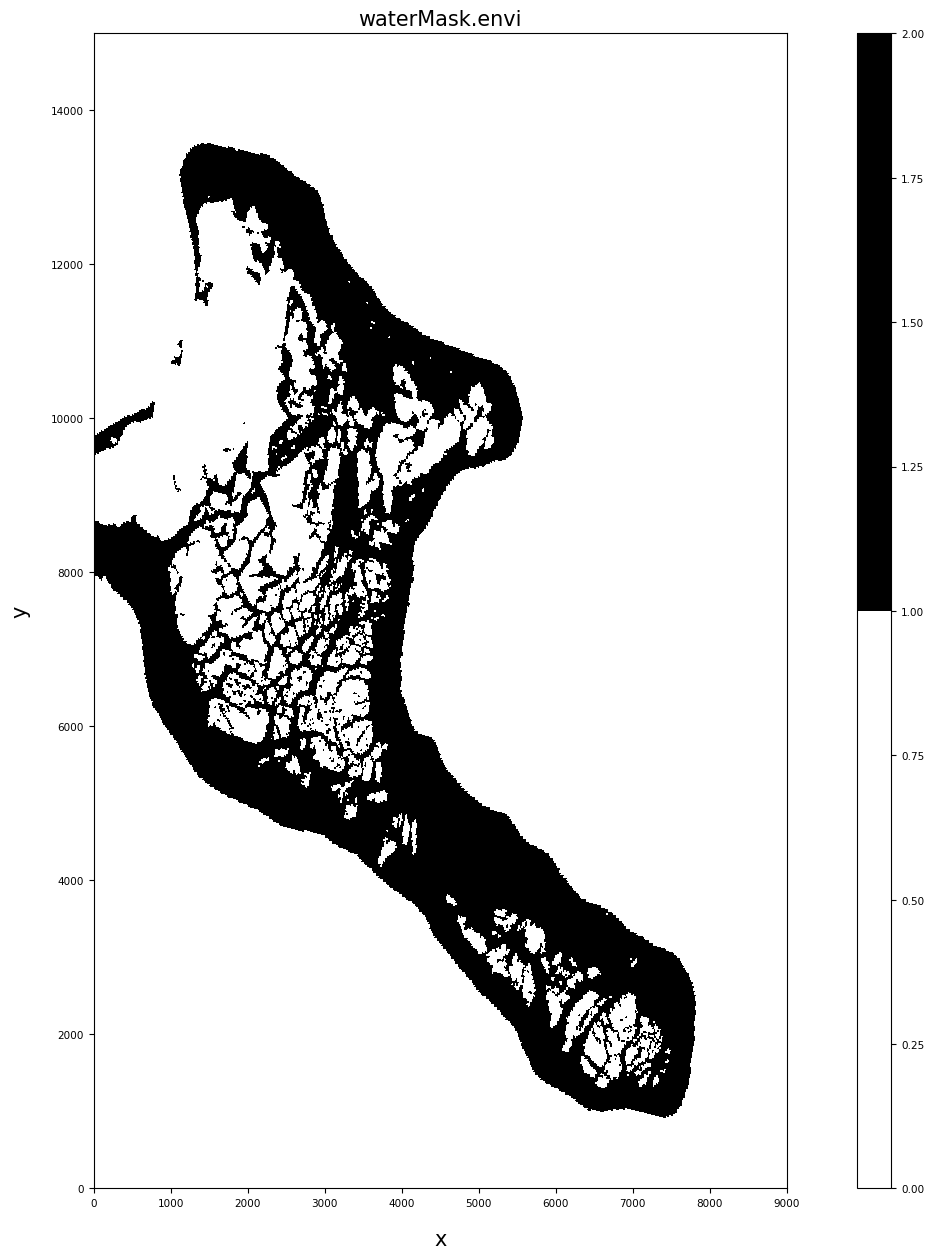

In [96]:
#NB: dst == Exp.path_mask
cmd  = f'plotFringe.py {Exp.path_mask} '
f, a = plotFringe.configure(cmd, (15,15), 15)

## Run FRiNGE

In [122]:
cmd  = f'nmap.py -i {Exp.path_wd}/coreg_stack/slcs_base.vrt '
cmd += f'-x {Exp.nx} -y {Exp.ny} -m {Exp.path_mask} '
cmd += f'-c {Exp.path_wd}/KS2{Exp.nxy}/count --o {Exp.path_wd}/KS2{Exp.nxy}/nmap '

print (cmd)
# !{cmd}
# nmap processing time: 106.408 mins

nmap.py -i /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/coreg_stack/slcs_base.vrt -x 33 -y 15 -m /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/masks/waterMask.envi -c /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/KS2_33_15/count --o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/KS2_33_15/nmap 


In [132]:
# DOES NOT WORK (tcoh) ns   = 50 # stack size; hack to make a single stack for the ~30 slcs in Kiribati 
ns   = 15 # stack size; hack to make a single stack for the ~30 slcs in Kiribati

cmd  = f'sequential.py -i {Exp.path_wd}/merged/SLC -s {ns}  -x {Exp.nx} -y {Exp.ny} '
cmd += f'-w {Exp.path_wd}/KS2{Exp.nxy}/nmap -b {Exp.path_wd}/coreg_stack/slcs_base.vrt '
cmd += f'-o {Exp.path_wd}/Sequential{Exp.nxy}'

print (cmd)
# !{cmd}
# runtime: a couple DAYS or so

sequential.py -i /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/merged/SLC -s 15  -x 33 -y 15 -w /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/KS2_33_15/nmap -b /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/coreg_stack/slcs_base.vrt -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/Sequential_33_15


In [133]:
cmd = f'adjustMiniStacks.py -s {Exp.path_wd}/slcs -M {ns} '
cmd += f'-m {Exp.path_wd}/Sequential{Exp.nxy}/miniStacks '
cmd += f'-d {Exp.path_wd}/Sequential{Exp.nxy}/Datum_connection '
cmd += f'-o {Exp.path_wd}/adjusted_wrapped_DS{Exp.nxy}'

print (cmd)
# !{cmd}
# runtime: instant

adjustMiniStacks.py -s /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/slcs -M 15 -m /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/Sequential_33_15/miniStacks -d /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/Sequential_33_15/Datum_connection -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/adjusted_wrapped_DS_33_15


In [125]:
cmd  = f'ampdispersion.py -i {Exp.path_wd}/coreg_stack/slcs_base.vrt '
cmd += f'-m {Exp.path_wd}/ampDispersion{Exp.nxy}/mean '
cmd += f'-o {Exp.path_wd}/ampDispersion{Exp.nxy}/ampdispersion'

print (cmd)
# !{cmd}
# ampdispersion processing time: 11.9857 mins

ampdispersion.py -i /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/coreg_stack/slcs_base.vrt -m /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/mean -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/ampdispersion


In [134]:
thresh = 0.4

cmd1  = f'gdal_translate {Exp.path_wd}/ampDispersion{Exp.nxy}/ampdispersion '
cmd1 += f'{Exp.path_wd}/ampDispersion{Exp.nxy}/ampdispersion.isce -of ISCE'

cmd2  = f'imageMath.py -e="a<{thresh}" --a={Exp.path_wd}/ampDispersion{Exp.nxy}/ampdispersion.isce '
cmd2 += f'-o {Exp.path_wd}/ampDispersion{Exp.nxy}/ps_pixels -t byte'

print (cmd1)
# !{cmd1}

print ('\n', cmd2)
# !{cmd2}

gdal_translate /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/ampdispersion /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/ampdispersion.isce -of ISCE

 imageMath.py -e="a<0.4" --a=/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/ampdispersion.isce -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/ampDispersion_33_15/ps_pixels -t byte


In [ ]:
## make IFGs; single reference
cmd  = f'integratePS.py -s {Exp.path_wd}/coreg_stack/slcs_base.vrt '
cmd += f'-d {Exp.path_wd}/adjusted_wrapped_DS{Exp.nxy} '
cmd += f'-t {Exp.path_wd}/Sequential{Exp.nxy}/Datum_connection/EVD/tcorr.bin '
cmd += f'-p {Exp.path_wd}/ampDispersion{Exp.nxy}/ps_pixels '
cmd += f'-o {Exp.path_wraps_all} --unwrap_method snaphu'

print (cmd)
# !{cmd}

# runtime: about 15 minutes or so

In [136]:
path_corrs = glob.glob(op.join(Exp.path_wraps_all, 'tcorr*'))
for pc in path_corrs:
    dst = op.join(Exp.path_wraps, op.basename(pc))
    os.unlink(dst) if op.islink(dst) else ''
    os.symlink(pc, dst)
    print (f'Symlinking {pc} to {dst}')

Symlinking /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/ALL/tcorr_ds_ps.bin to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/SR/tcorr_ds_ps.bin
Symlinking /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/ALL/tcorr_ds_ps_ISCE.bin to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/SR/tcorr_ds_ps_ISCE.bin
Symlinking /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/ALL/tcorr_ds_ps_ISCE.bin.xml to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/SR/tcorr_ds_ps_ISCE.bin.xml
Symlinking /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/ALL/tcorr_ds_ps_ISCE.bin.vrt to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/SR/tcorr_ds_ps_ISCE.bin.vrt
Symlinking /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/ALL/tcorr_ds_ps_ISCE.3alks_3rlks.bin to /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Kiribati/PS_DS_33_15/SR/tcorr_ds_ps_ISCE.3alks_3rlks.bin
Symlinking /u/l

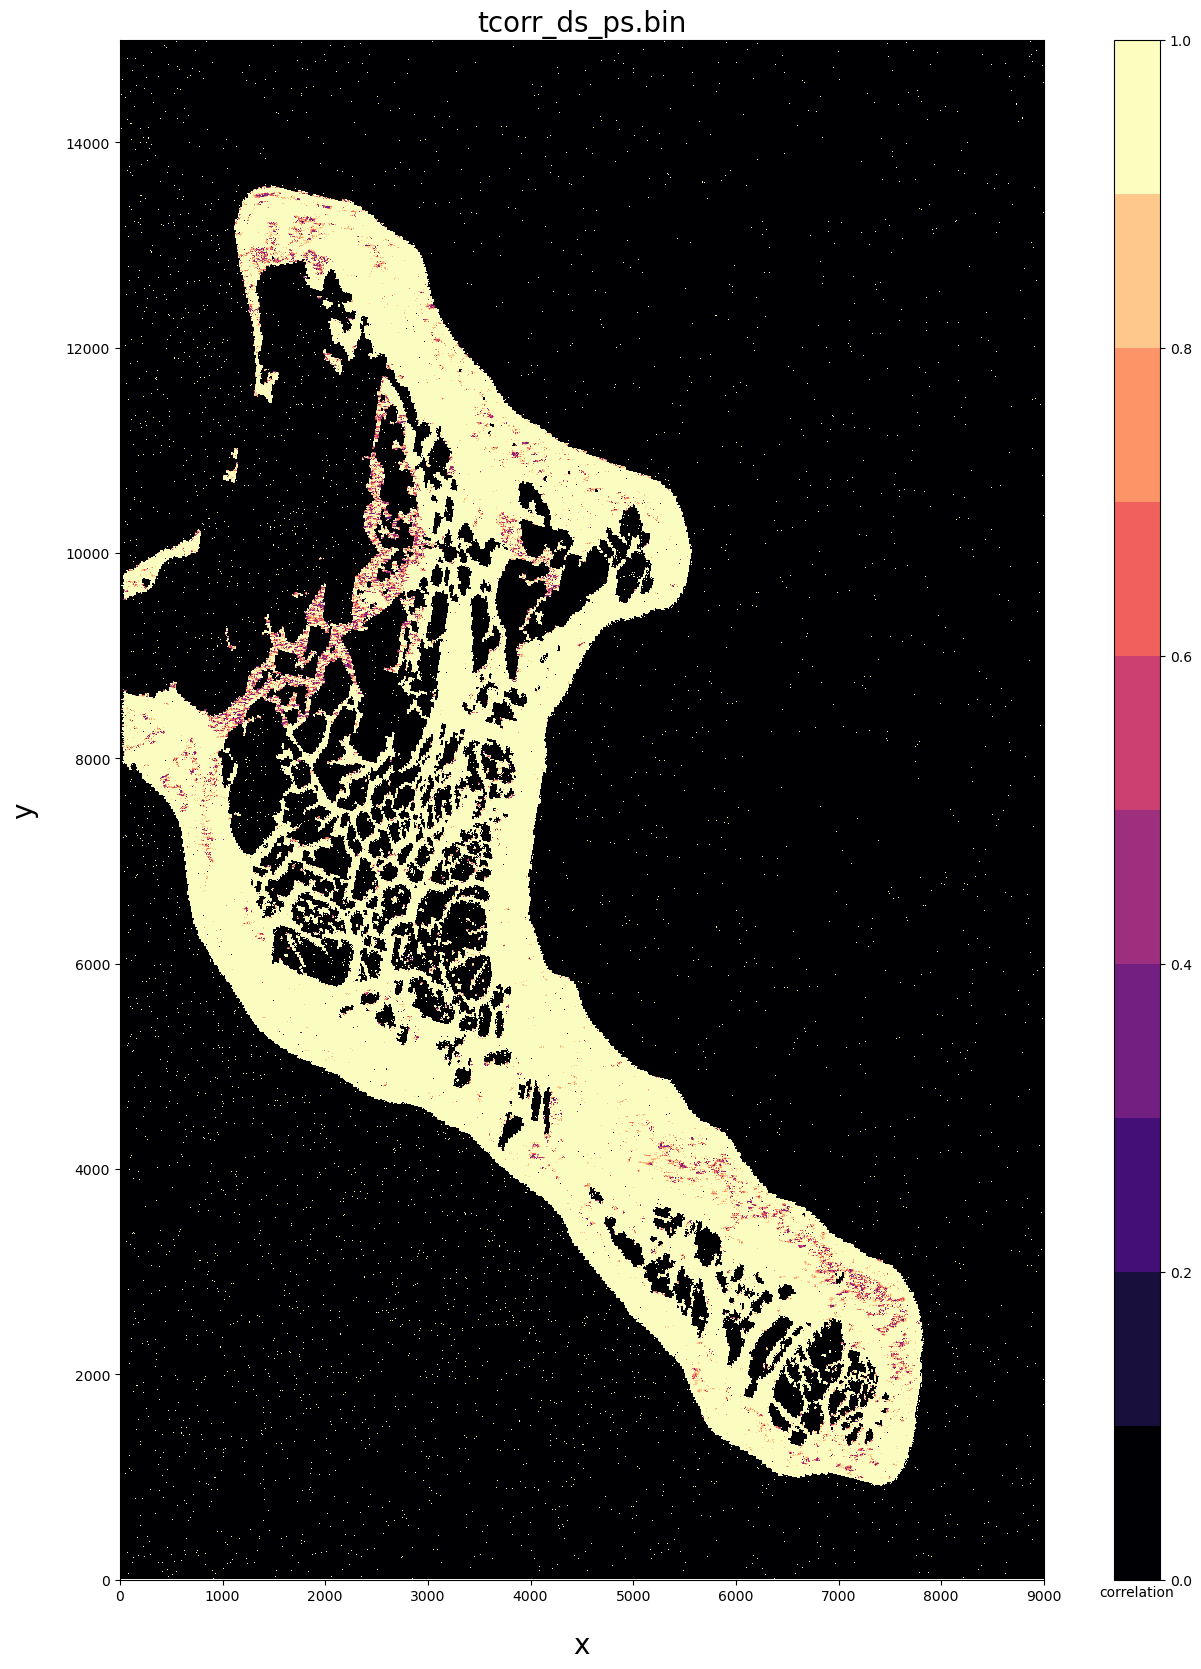

In [137]:
# correlation 
cmd  = f'plotFringe.py {Exp.path_corr} '#-m {Exp.path_mask}'

f, a = plotFringe.configure(cmd, figsize=fs, labelsize=ls)
# note that negative values (which arent seen here due to my colorbar) indicate places Fringe has problems

**SWITCH NOW TO REGULAR FRINGE PROCESSING (2-prepareUnwrap)**

## Prep MintPy

In [97]:
args  = f'-f {Exp.path_wd}/Igrams/*/filt_*.unw '
args += f'-m {Exp.path_wd}/Igrams/20071215_20080501/referenceShelve/data.dat '
args += f'-b {Exp.path_wd}/baseline/ '
args += f'-g {Exp.path_wd}/geom_reference'

cmd = f'prep_isce.py {args}'
print (cmd)
!{cmd}

prep_isce.py -f /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/*/filt_*.unw -m /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.dat -b /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/baseline/ -g /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/geom_reference
['/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.rsc'] exists and is newer than ['/u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/referenceShelve/data.dat'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/baseline/
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20080501/filt_20071215_20080501_snaphu.unw
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20091220/filt_20071215_20091220_snaphu.unw
preparing RSC file for: /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/Igrams/20071215_20100622/filt_20071215_2010

## Run MintPy?

## Plot MintPy

view.py /u/leffe-data2/buzzanga/data/VLM/ALOS/NYC/MintPy_9alks_4rlks_0_0/NYBP_Base/geo/geo_velocity.h5 velocity -u mm -c roma --noverbose -v -5 5 --figsize 30 10


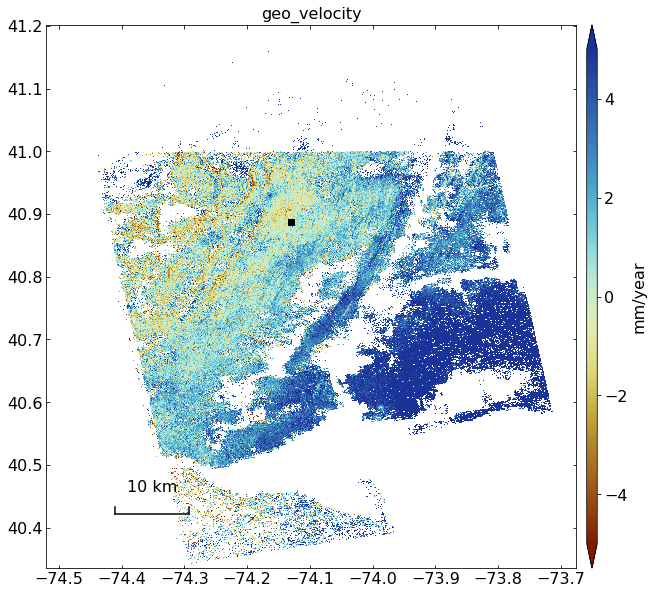

In [29]:
%matplotlib inline
fs  = '30 10'.split()

cmd = f'{Exp.path_vlos_geo} velocity -u mm -c roma --noverbose -v -5 5 --figsize {fs[0]} {fs[1]} '
# cmd = f'{cmd} -m {Exp.path_mask_mp_geo} ' # waterMask only; leave off for tcoh mask
view.main(cmd.split())



# cmd = f'view.py {Exp.path_vlos_geo} residue -u mm -c roma_r --noverbose --figsize {fs[0]} {fs[1]} '
# cmd = f'{cmd} -m {Exp.path_mask_mp_geo} ' # waterMask only; leave off for tcoh mask

# obj = viewer(cmd)
# obj.configure(); obj.plot()